In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.impute import SimpleImputer
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv('C:/Users/Lenovo/Desktop/model Create/Maternal Health Risk Data Set.csv')




RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


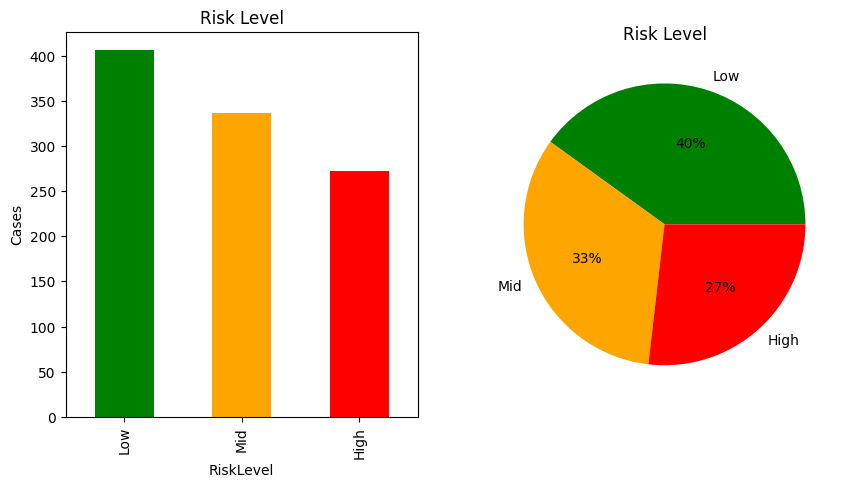

In [41]:
# Plot bar and pie charts for the target variable
total = data["RiskLevel"].count()
low = total - (336 + 272)
mid = total - (406 + 272)
high = total - (406 + 336)
print(data["RiskLevel"].value_counts())

labels = ["Low", "Mid", "High"]
risk_color = ["green", "orange", "red"]

plt.subplot(121)
vis_maternal_health = data.RiskLevel.value_counts().plot(
    figsize=(10, 5),
    kind="bar",
    color=risk_color,
)
plt.title("Risk Level")
plt.ylabel("Cases")
plt.xticks(range(len(labels)), labels)

plt.subplot(122)
plt.title("Risk Level")
vis_maternal_health = plt.pie(
    [low, mid, high],
    labels=labels,
    colors=risk_color,
    autopct="%1.0f%%",
)

plt.show()

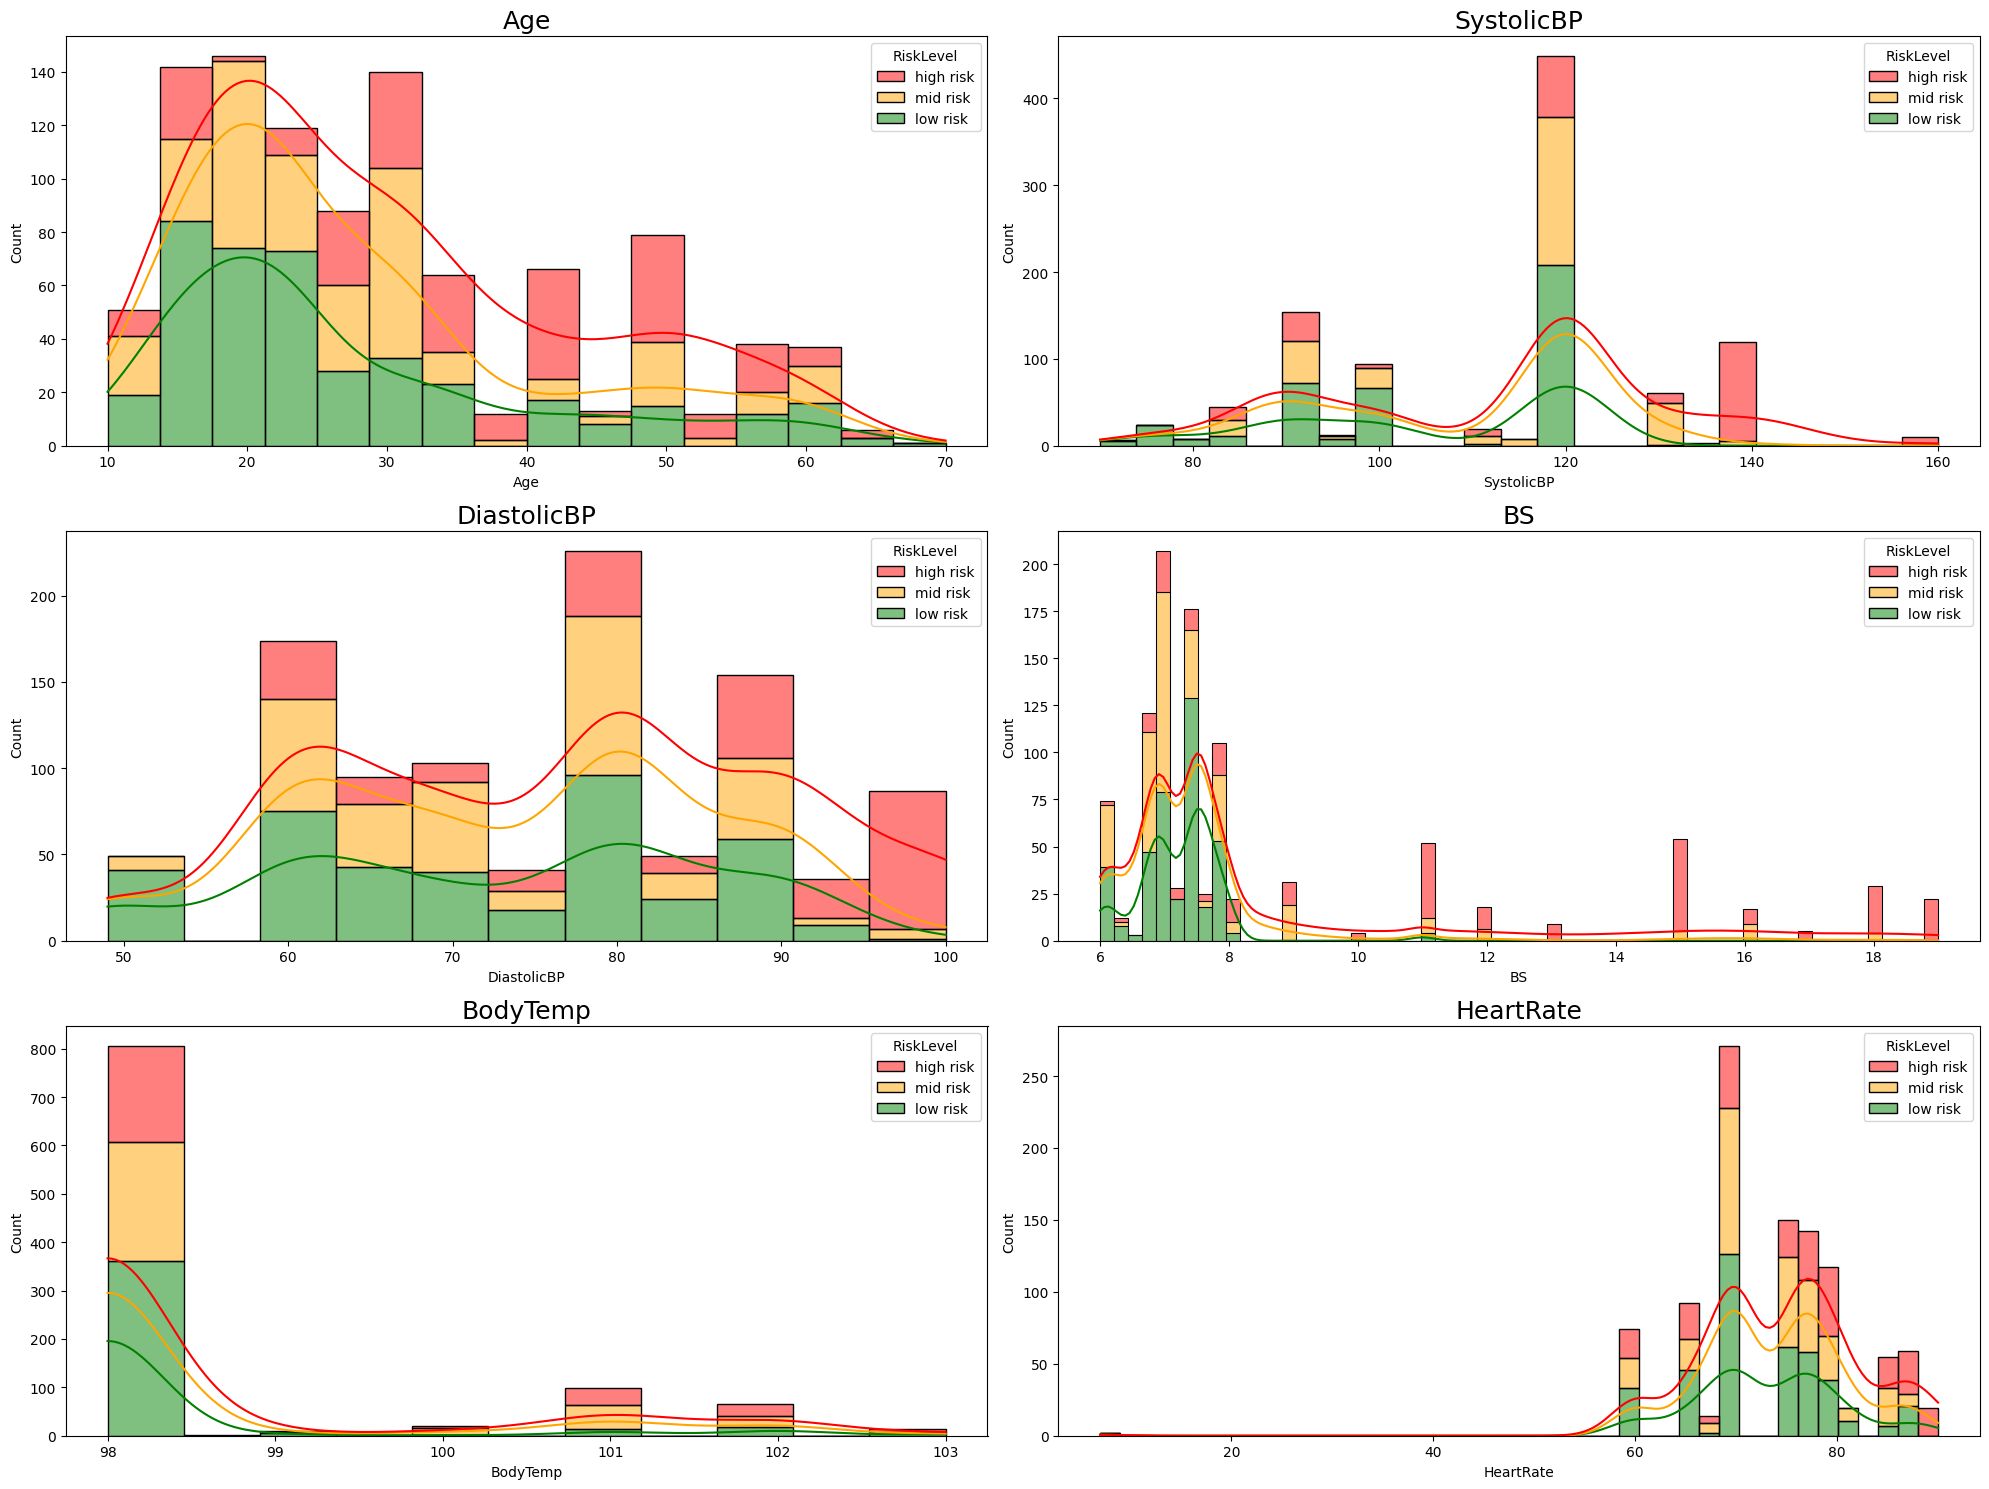

In [42]:
# Plot stacked histograms for the feature variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
risk_level_order = ["high risk", "mid risk", "low risk"]

for ax, column in zip(axes.flatten(), data.columns):
    sns.histplot(data=data, 
                 x=column, 
                 kde=True, 
                 hue="RiskLevel", 
                 hue_order=risk_level_order, 
                 multiple="stack",
                 palette={"low risk": "green", "mid risk": "orange", "high risk": "red"},
                 element="bars", ax=ax)
    ax.set_title(f"{column}", fontsize=18)

plt.tight_layout()
plt.show()

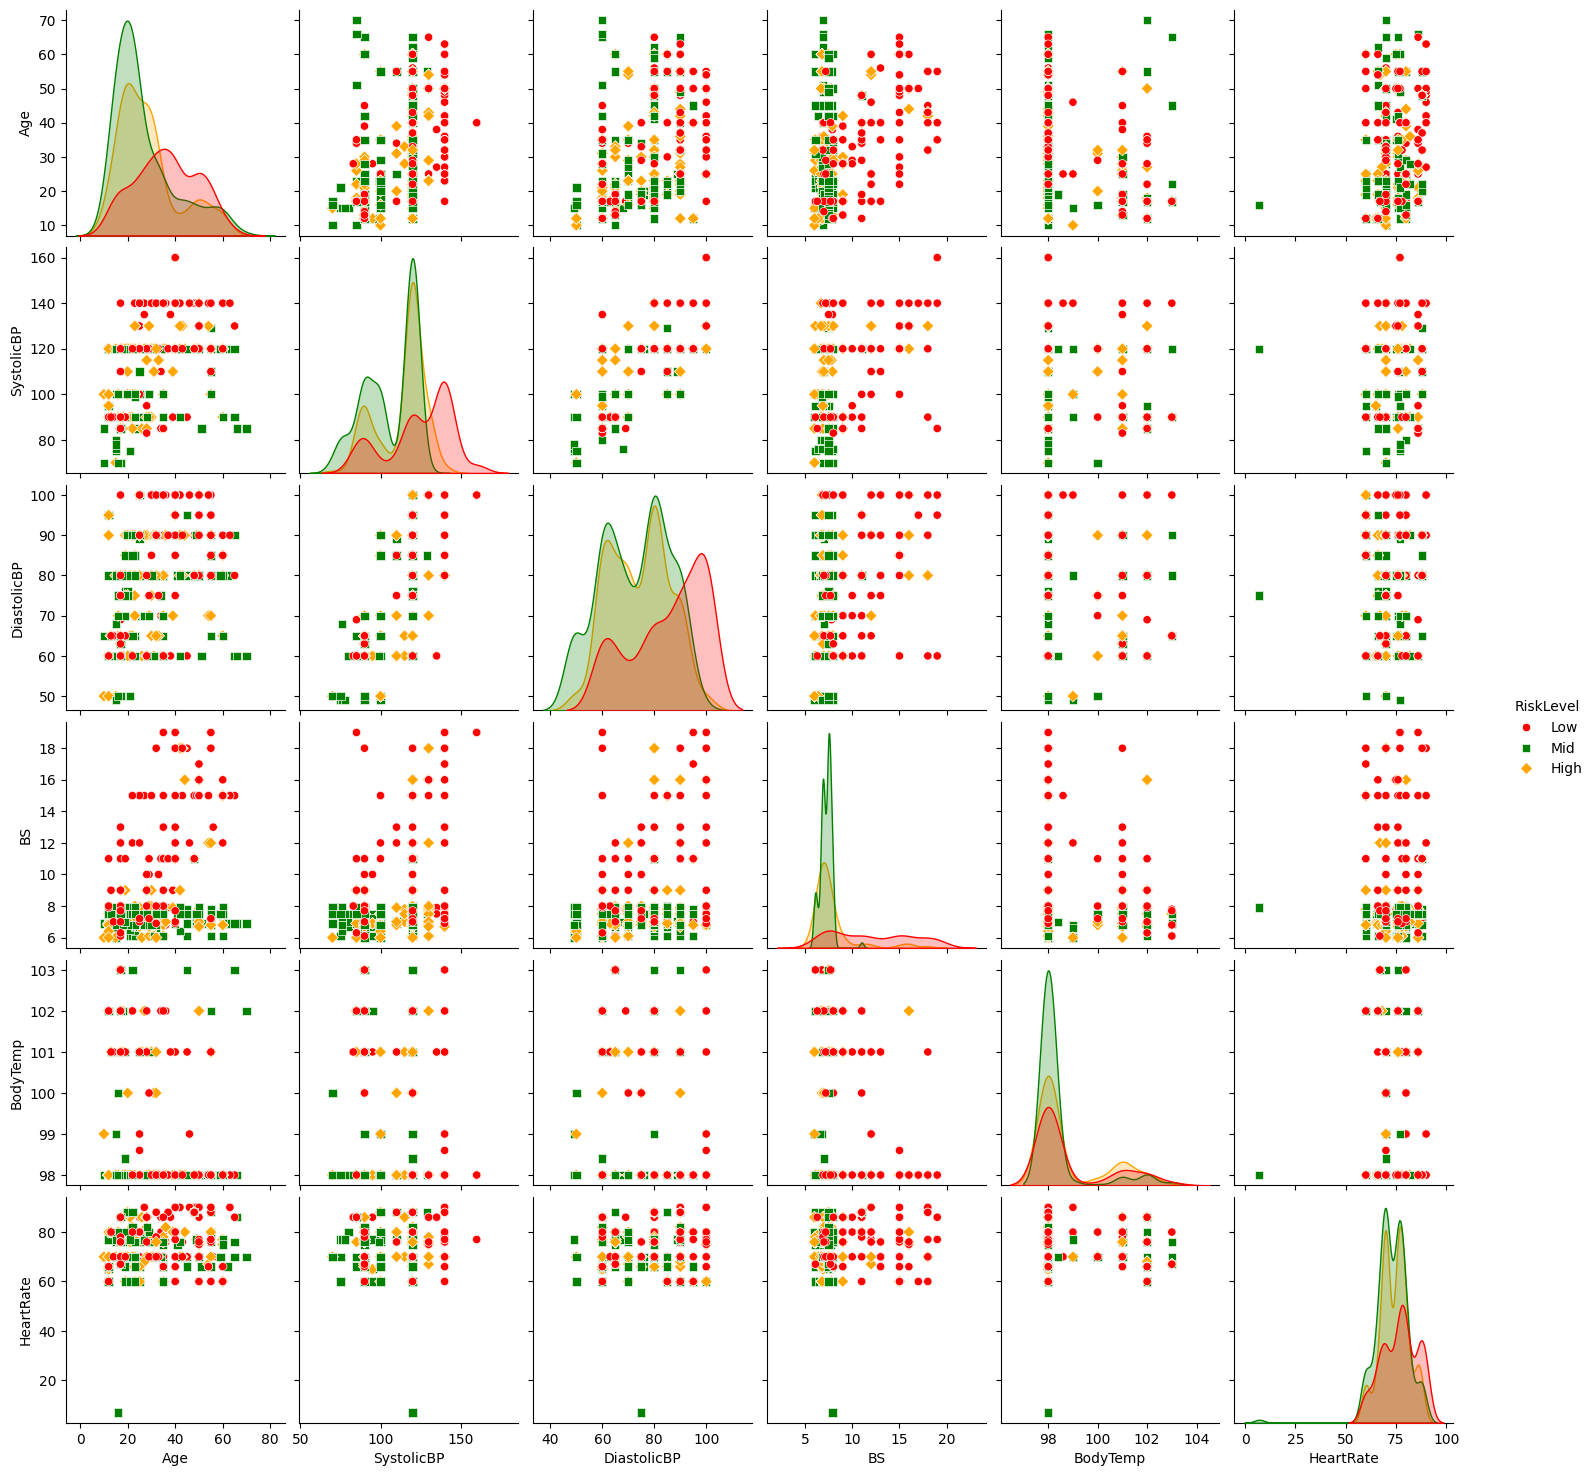

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated risk_colors dictionary to match string values in 'RiskLevel' column
risk_colors = {"low risk": "green", "mid risk": "orange", "high risk": "red"}

# Creating the pairplot with the updated risk_colors
plot = sns.pairplot(data, hue='RiskLevel', palette=risk_colors, markers=["o", "s", "D"])

# Updated legend_labels to match the new keys in risk_colors
legend_labels = {"low risk": "Low", "mid risk": "Mid", "high risk": "High"}
for text, label in zip(plot._legend.texts, legend_labels.values()):
    text.set_text(label)

# Display the plot
plt.show()


In [44]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [45]:
sum(data["HeartRate"] < 30)

2

In [46]:
data = data.drop(data.index[data.HeartRate < 30])
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [47]:
data["diff"] = data["SystolicBP"] - data["DiastolicBP"]
data["f1"] = data["diff"]+data["BodyTemp"]

In [48]:
# Original Dataset
X = data.drop("RiskLevel", axis=1)
y = data.RiskLevel

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")

Original data has 809 train data and 203 test data



In [49]:
# Define the CatBoost classifier
catboostm = CatBoostClassifier()

# Parameters grid for GridSearch
param_grid = {
    'iterations': [500,1000],  # Try different iteration values
    'learning_rate': [0.15, 0.2],  # Try different learning rates
    'depth': [8, 10,12]  # Try different depth values
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=catboostm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=20, verbose=10)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions using the best model
best_catboost_model = grid_search.best_estimator_
predictions = best_catboost_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Tuned CatBoost Accuracy: {accuracy}')


0:	learn: 1.0174430	test: 1.0299167	best: 1.0299167 (0)	total: 12.9ms	remaining: 6.45s
10:	learn: 0.6719919	test: 0.7041751	best: 0.7041751 (10)	total: 120ms	remaining: 5.35s
20:	learn: 0.5551396	test: 0.6061686	best: 0.6061686 (20)	total: 182ms	remaining: 4.15s
30:	learn: 0.5023326	test: 0.5644950	best: 0.5644950 (30)	total: 260ms	remaining: 3.93s
40:	learn: 0.4541249	test: 0.5427911	best: 0.5427911 (40)	total: 370ms	remaining: 4.14s
50:	learn: 0.4156813	test: 0.5241129	best: 0.5241129 (50)	total: 452ms	remaining: 3.98s
60:	learn: 0.3871414	test: 0.5073026	best: 0.5073026 (60)	total: 521ms	remaining: 3.75s
70:	learn: 0.3634677	test: 0.4904803	best: 0.4904803 (70)	total: 589ms	remaining: 3.56s
80:	learn: 0.3423319	test: 0.4768079	best: 0.4768079 (80)	total: 683ms	remaining: 3.53s
90:	learn: 0.3225432	test: 0.4666698	best: 0.4666698 (90)	total: 766ms	remaining: 3.44s
100:	learn: 0.3058938	test: 0.4618253	best: 0.4613346 (99)	total: 846ms	remaining: 3.34s
110:	learn: 0.2930593	test: 0.45

In [50]:
import pickle

# Save the model to a file
with open('catboost.pkl', 'wb') as f:
    pickle.dump(best_catboost_model, f)


In [52]:
with open('catboost.pkl', 'rb') as pickle_in:
    classifier = pickle.load(pickle_in)


In [53]:
print(type(classifier))  # Check if the loaded model is of type CatBoostClassifier
print(classifier.get_params())  # Print model parameters to verify

<class 'catboost.core.CatBoostClassifier'>
{'depth': 10, 'iterations': 500, 'learning_rate': 0.2}


In [67]:
import joblib
Cat = joblib.load('./catboost.pkl')

In [65]:
import numpy as np
def catpredict(model,f):
    f.append(f[1]-f[2])
    f.append(f[1]-f[2]+f[4])
    f = np.array([f])
  
    d = {0:"high risk",1:"low risk",2:"mid risk"}
    prediction = model.predict(f)[0][0]

    return d[prediction]

In [69]:
di = {"Age":45,
     "SystolicBP":90,
     "DiastolicBP":90,
      "BS":7.0,
      "BodyTemp":100.0,
      "HeartRate":88
     }
f = list(di.values())
print(catpredict(Cat,f))

KeyError: 'low risk'

None
